In [2]:
%load_ext autoreload
%autoreload 2

#import sys
import pandas
#sys.path.append("..")
#import pandas
import numpy as np
import matplotlib.pyplot as plt

datadir0  = '/Users/billiemeadowcroft/Dropbox/Collagen/NargessPlotting/GithubCode/Figures/Fig7sMutants/Data/'
#datadir0  = '/Users/billiemeadowcroft/Dropbox/Collagen/NargessPlotting/GithubCode/Figures/FigAlignment/Data/'
plotsdir  = '//Users/billiemeadowcroft/Dropbox/Collagen/NargessPlotting/GithubCode/Figures/Fig7sMutants/Plots/'
clrs = ["black","#c239e8","#1f78b4","#b2df8a","#33a02c"]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/billiemeadowcroft/Dropbox/Collagen/NargessPlotting/GithubCode/Figures/Fig7sMutants/Data/XStretch100_Fraction0.56/thermo_seed1.dat
indexTimeEq 42500 len(TimeEq) 50001 len(VolTime) 49876 len(stressX) 7376
ff 0 len(StressAv) 49876 len(Time) 7376 Time[-1] 4124840
/Users/billiemeadowcroft/Dropbox/Collagen/NargessPlotting/GithubCode/Figures/Fig7sMutants/Data/XStretch100_Fraction0.56/thermo_seed2.dat
indexTimeEq 42500 len(TimeEq) 50001 len(VolTime) 93490 len(stressX) 50990
ff 0 len(StressAv) 93490 len(Time) 50990 Time[-1] 12934868
/Users/billiemeadowcroft/Dropbox/Collagen/NargessPlotting/GithubCode/Figures/Fig7sMutants/Data/XStretch100_Fraction0.56/thermo_seed3.dat
indexTimeEq 42500 len(TimeEq) 50001 len(VolTime) 64487 len(stressX) 21987
ff 0 len(StressAv) 64487 len(Time) 21987 Time[-1] 7076262
/Users/billiemeadowcroft/Dropbox/Collagen/NargessPlotting/GithubCode/Figures/Fig7sMutants/Data/XStretch100_Fraction0.75/thermo_seed1.dat
indexTimeEq 42500 len(TimeEq) 50001 len(VolTime) 60147 le

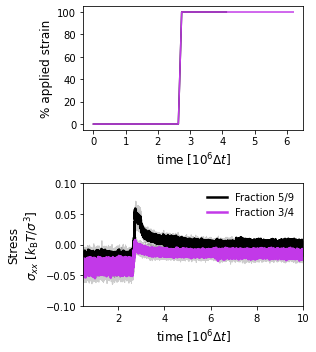

In [29]:
NumMolecules=15680
folderhandles = ['XStretch100_Fraction0.56/','XStretch100_Fraction0.75/','Equilibration_Fraction0.56/','Equilibration_Fraction0.75/']
seeds = "1 2 3".split()
labels = ['Fraction 5/9', 'Fraction 3/4']
#seeds2 = "1 2 3".split()
fig,ax= plt.subplots(2,1,figsize = (4.5,5))
fs2 = 12
TEq = 2635000 #1085000
Vol = 164*164*12
TStretch = 1e5


for ff in range(2):
    StressAll = []
    Times = []
    folderhandle = folderhandles[ff]
    strain=1
    for s in range(len(seeds)):
        VolTime = []
        name = "thermo_seed"+seeds[s]+".dat"
        #name2 = "thermo_seed"+seeds[s]+".dat"
        datafolder = datadir0+folderhandle+name
        datafolderEq = datadir0+folderhandles[2+ff]+name
        thermo = pandas.read_csv(datafolder, sep = ' ', header = 'infer')
        thermoEq = pandas.read_csv(datafolderEq, sep = ' ', header = 'infer')
        print(datafolder)
        stressX = thermo.stressX
        stressXEq = thermoEq.stressX
        stressX = stressX.values
        stressXEq = stressXEq.values
        Time = thermo.step
        TimeEq = thermoEq.step
        Time = Time.values
        TimeEq = TimeEq.values

        indexTimeEq  = np.argmin(np.abs(TimeEq - TEq))

        for r in range(len(TimeEq[:indexTimeEq])):
            VolTime.append(Vol)

        for t in range(len(Time)):
            if Time[t] <= TEq:
                VolTime.append(Vol)
            if Time[t] > TEq and Time[t] <= TEq+TStretch:
                VolTime.append(Vol+Vol*strain*((Time[t]-TEq)/TStretch))
            if Time[t] > TEq+TStretch:
                VolTime.append((1+strain)*Vol)
        
        print("indexTimeEq",indexTimeEq,"len(TimeEq)",len(TimeEq),"len(VolTime)",len(VolTime),"len(stressX)",len(stressX))
        stressxAv = np.divide(np.concatenate([stressXEq[:indexTimeEq], stressX]), VolTime)
        StressAll.append(stressxAv)
        TimeTot = np.concatenate([TimeEq[:indexTimeEq], Time])
        Times.append(TimeTot)
        print("ff",ff,"len(StressAv)",len(stressxAv),"len(Time)",len(Time),'Time[-1]',Time[-1])
        
        #ax[1].plot(np.divide(Time,1e6),stressxAv,alpha = 0.2,color = clrs[s])
        if s == 0:
            ax[0].plot(np.divide(TimeTot,1e6),np.divide(np.subtract(VolTime,Vol),Vol/100),color = clrs[ff])
    # Create a masked array to handle variable-length data
    max_len = max(len(arr) for arr in StressAll)
    longest_idx = np.argmax([len(arr) for arr in StressAll])
    masked = np.ma.empty((len(StressAll), max_len))
    Time = Times[longest_idx]
    masked.mask = True  # mask everything by default

    # Fill in available data for each array
    for i, arr in enumerate(StressAll):
        masked[i, :len(arr)] = arr
        masked.mask[i, :len(arr)] = False  # unmask valid entries
    
    stressAvAv = masked.mean(axis=0).filled(np.nan) #np.mean(StressAll,axis=0)
    stressStd = masked.std(axis=0).filled(np.nan) #np.std(StressAll,axis=0)

    ax[1].plot(np.divide(Time,1e6),stressAvAv,color = clrs[ff],linewidth = 2.5,label = labels[ff])
    ax[1].fill_between(np.divide(Time,1e6),np.subtract(stressAvAv,stressStd),np.add(stressAvAv,stressStd),color = clrs[0],alpha = 0.2)
#ax[0].plot([(TEq+1e5)/1e6,20],[100,100],color = clrs[0])
#ax[0].plot([(TEq+1e5)/1e6,20],[0,0],color = clrs[1])
ax[1].set_ylabel('Stress\n'+r"$\sigma_{xx} ~[k_{\mathrm{B}}T/\sigma^{3}$]",fontsize =fs2)
ax[0].set_ylabel("% applied strain",fontsize =fs2)
ax[1].legend(frameon=False)
ax[1].set_xlabel(r"time [$10^6\Delta t$]",fontsize =fs2)

ax[0].set_xlabel(r"time [$10^6\Delta t$]",fontsize =fs2)
#ax[0].set_xlim([0.5,5])
ax[1].set_xlim([0.5,10])
ax[1].set_ylim([-0.1,0.1])
#ax[1].set_xlim([6,7])
#ax[1].set_ylim([-0.1,2.5])
fig.tight_layout()

Molecule alignment

/var/folders/wt/4tgp65891vd4l6wskkxdnvk40000gn/T/ipykernel_59495/2257981024.py:19: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dotX_Eq = pandas.read_csv(datafolderEq, sep = ' ', usecols = [0], header =None)


indexTimeEq 84 timestepsEq 101 max(timestepsEqReal) 3131000.0 Min(timestepsEqReal) 0.0 TEq 2635000


/var/folders/wt/4tgp65891vd4l6wskkxdnvk40000gn/T/ipykernel_59495/2257981024.py:19: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dotX_Eq = pandas.read_csv(datafolderEq, sep = ' ', usecols = [0], header =None)


indexTimeEq 84 timestepsEq 101 max(timestepsEqReal) 3131000.0 Min(timestepsEqReal) 0.0 TEq 2635000


/var/folders/wt/4tgp65891vd4l6wskkxdnvk40000gn/T/ipykernel_59495/2257981024.py:19: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dotX_Eq = pandas.read_csv(datafolderEq, sep = ' ', usecols = [0], header =None)


indexTimeEq 84 timestepsEq 101 max(timestepsEqReal) 3131000.0 Min(timestepsEqReal) 0.0 TEq 2635000


/var/folders/wt/4tgp65891vd4l6wskkxdnvk40000gn/T/ipykernel_59495/2257981024.py:19: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dotX_Eq = pandas.read_csv(datafolderEq, sep = ' ', usecols = [0], header =None)


indexTimeEq 84 timestepsEq 101 max(timestepsEqReal) 3131000.0 Min(timestepsEqReal) 0.0 TEq 2635000


/var/folders/wt/4tgp65891vd4l6wskkxdnvk40000gn/T/ipykernel_59495/2257981024.py:19: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dotX_Eq = pandas.read_csv(datafolderEq, sep = ' ', usecols = [0], header =None)


indexTimeEq 84 timestepsEq 101 max(timestepsEqReal) 3131000.0 Min(timestepsEqReal) 0.0 TEq 2635000


/var/folders/wt/4tgp65891vd4l6wskkxdnvk40000gn/T/ipykernel_59495/2257981024.py:19: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dotX_Eq = pandas.read_csv(datafolderEq, sep = ' ', usecols = [0], header =None)


indexTimeEq 84 timestepsEq 101 max(timestepsEqReal) 3131000.0 Min(timestepsEqReal) 0.0 TEq 2635000


(0.33, 0.6)

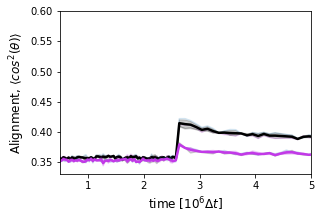

In [38]:
fig,ax= plt.subplots(1,figsize = (4.5,3))
frame = 101000
folderhandles = ['XStretch100_Fraction0.56/','XStretch100_Fraction0.75/','Equilibration_Fraction0.56/','Equilibration_Fraction0.75/']
frameEq = 31000
seeds = "1 2 3".split()
seeds2 = "1 2 3".split()
for ff in range(2):
    Times = []
    MolTot = []
    folderhandle = folderhandles[ff]
    for s in range(len(seeds)):
        name = "MolAlignrun_seed"+seeds[s]
        #name2 = "MolAlignrun_seed"+seeds2[s]
        tEq_add = TEq
        summingtSq=[]
        datafolder = datadir0+folderhandle+name+'.txt'
        datafolderEq = datadir0+folderhandles[2+ff]+name+'.txt'
        dotX_ = pandas.read_csv(datafolder, sep = ' ', usecols = [0], header =None)
        dotX_Eq = pandas.read_csv(datafolderEq, sep = ' ', usecols = [0], header =None)
        timesteps1 = int((len(dotX_))/(NumMolecules+1))
        timestepsEq = int((len(dotX_Eq))/(NumMolecules+1))
        dotX_Eq__ = np.reshape(dotX_Eq.values,(timestepsEq,-1))
        dotX_Eq = dotX_Eq__ [:,1:]
        dotX_EqF = np.abs(dotX_Eq.astype(float))
        dotX__ = np.reshape(dotX_.values,(timesteps1,-1))
        dotX = dotX__ [:,1:]
        dotXF = np.abs(dotX.astype(float))
        time = []
        timestepsEqReal = np.linspace(0,timestepsEq*frameEq,timestepsEq)
        indexTimeEq  = np.argmin(np.abs(timestepsEqReal - TEq))
        print("indexTimeEq",indexTimeEq,"timestepsEq",timestepsEq,"max(timestepsEqReal)",np.max(timestepsEqReal),"Min(timestepsEqReal)",np.min(timestepsEqReal),"TEq",TEq)
        for t in range(indexTimeEq):
            time.append(np.add(np.multiply(t,int(frameEq)),0))
            summingtSq.append((np.sum(np.multiply(dotX_EqF[t],dotX_EqF[t]))/NumMolecules))
        for t in range(timesteps1-1):
            time.append(np.add(np.multiply(t,int(frame)),tEq_add))
            summingtSq.append((np.sum(np.multiply(dotXF[t],dotXF[t]))/NumMolecules))
        ax.plot(np.divide(time,1e6),summingtSq,color = clrs[s],alpha = 0.2)

        MolTot.append(summingtSq)
        Times.append(time)
    max_len = max(len(arr) for arr in MolTot)
    longest_idx = np.argmax([len(arr) for arr in MolTot])
    masked = np.ma.empty((len(MolTot), max_len))
    Time = Times[longest_idx]
    masked.mask = True  # mask everything by default

    # Fill in available data for each array
    for i, arr in enumerate(MolTot):
        masked[i, :len(arr)] = arr
        masked.mask[i, :len(arr)] = False  # unmask valid entries

    MolTotAv = masked.mean(axis=0).filled(np.nan) 
    MolTotStd = masked.std(axis=0).filled(np.nan)
    time = Times[longest_idx]
    ax.plot(np.divide(time,1e6),MolTotAv,color = clrs[ff],linewidth = 2.5,label = 'Average')
    ax.fill_between(np.divide(time,1e6),np.subtract(MolTotAv,MolTotStd),np.add(MolTotAv,MolTotStd),color = clrs[ff],alpha = 0.2,label = 'Standard deviation')

ax.set_xlabel(r"time [$10^6\Delta t$]",fontsize =fs2)
ax.set_ylabel(r'Alignment, $\langle cos^{2}(\theta)\rangle$',fontsize =fs2)
ax.set_xlim([0.5,5])
ax.set_ylim([0.33,0.6])
#ax[1].set_xlim([0.5,5])
